## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Code

Prevendo atrasos de voos ✈
Nosso case a ser analisado na aula de hoje é um dataset que contém algumas características sobre informações de voos.

Nosso foco basicamente consiste em prever se um determinado voo sofrerá atrasos, a partir da informação da partida programada.

Flight: Número do voo.

Time: Horário de partida do voo.

Length: Duração do voo.

Airline: Nome do avião.

AirportFrom: Partida.

AirportTo: Destino.

DayOfWeek: Dia da semana

Class: Classe de atraso.

In [3]:
df = pd.read_csv("bases/airlines.csv", sep=',')

In [4]:
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0


In [5]:
df.shape

(539382, 8)

#### Analise da consistência dos dados

In [6]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [7]:
dupli_cols = []
for col in df.columns:
    if df[col].duplicated().any():
        dupli_cols.append(col)
print(dupli_cols)

['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


#### Análise exploratória dos dados

In [8]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


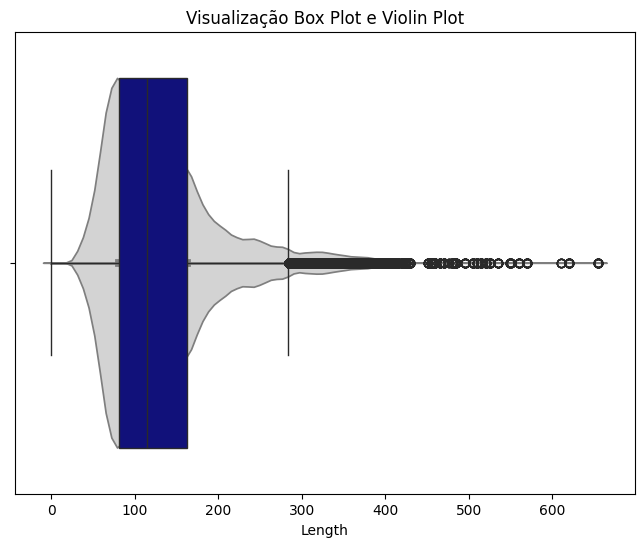

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

sns.violinplot(x='Length', data=df, ax=ax, color='lightgray')
sns.boxplot(x='Length', data=df, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Box Plot e Violin Plot')

plt.show()

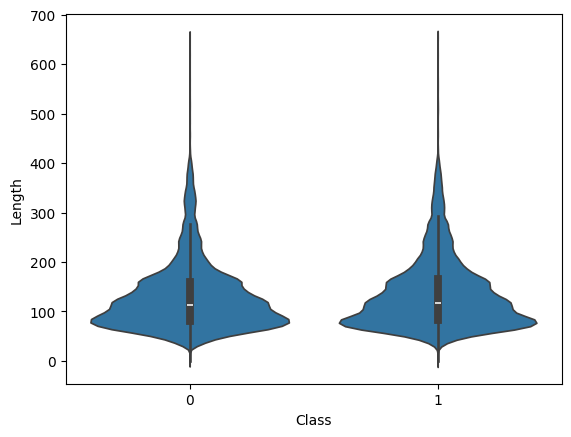

In [10]:
sns.violinplot(x='Class', y='Length', data=df)
plt.show()

A distribuição dos dados entre as classes de atraso sim e não são bem parecidas. Segue abaixo a média de duração dos voos:

In [11]:
atraso_voo = df.groupby('Class')
atraso_voo.describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000